# 1. Introduction
The objective of this code is to generate useful information on the performance of students in the exams, and use this data to gain a better understanding of individual questions and their correlation with the student's overall exam performance. Difficulty plots and Correlation plots are used to visualize this analysis


# 2. Data Extraction and Pre-Processing
The data for this analysis is obtained from the CS101 RELATE page. To obtain the information, login to the relate page and click on the Grading tab, on the top of website. Choose Gradebook, and click the exam/quiz/homework (for example, select Flow CS101 hw4 for hw4) you wish to extract the data for. Click on View Page Grades. Unfortunately, on the current version of RELATE, there is no option to download a .csv of the scores. You have to copy the entire content onto MS Excel and import is a .csv file

# 3. CSV file Editing
Minimal editing needsOn the CSV file, the **0th row** will be the User-ID (i.e the student's illinois email ID). The **1st row** to **nth row** will be the percentage of score recieved for each question. The **last row** will be the overall grade. Look at this image, - https://drive.google.com/file/d/0B0Tbo64ibHPmcUlnWUFUbXlEbU0/view?usp=sharing remove the yellow columns and rename the orange row as 1,2,3... instead of 2,3,4.. (This is because question 1 doesn't count for points). Your final csv file, must look like this https://drive.google.com/file/d/0B0Tbo64ibHPmUElweXo3ZTVPczA/view?usp=sharing 

# 4. Program


In [17]:
#Exam Statistics Program for CS101 by Anirudh Madhusudan
#IMPORTANT: Please read the instructions on data extraction, and csv editing before you excute

import csv,statistics,math,seaborn
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

#OBTAINING THE CSV FILE
#Change the directory below based on your storage location

f = open('/home/anirudh2/Downloads/trial11.csv')
csv_f = csv.reader(f)

#REMOVING ANY INSTRUCTORS/TAs FROM THE LIST OF SCORES 
#This is done because TAs usually review the exam before it is posted, 
#We don't want their scores to be a part of our evaluation

instructor_list = []
query = 'Y'
while (query == 'Y' or query == 'y'):
    instructor = input("Enter the email ID of the TA/Instructor who reviewed the exam: ")
    instructor_list.append(instructor)
    query = input("Are there more TA/Instructor? (Y/N): ")

print ("_______________________________________________________________________________")


#OBTAINING INFORMATION ABOUT THE EXAM FROM THE USER
#This code assumes that the all the MCQs appear together and all the coding questions together
#For example coding questions from 1-25, MCQs from 26-30

print ("QUESTIONS ON THE EXAM")
no_of_Q = int(input("Enter the total number of questions on the exam: "))
max_points = int(input("Enter the max points obtainable in this exam, this is NOT same as percentage: "))

print ("_______________________________________________________________________________")

print ("CODING QUESTIONS")
coding_Q_start= input("Enter the question number of the FIRST coding question: ")
coding_Q_end = input("Enter the question number of the LAST coding question: ")


print ("_______________________________________________________________________________")
print ("MULTIPLE CHOICE QUESTIONS")
MCQ_Q_start = int(input("Enter the question number of the FIRST multiple-choice question: "))
MCQ_Q_end = int(input("Enter the question number of the LAST multiple-choice question: "))
print ("_______________________________________________________________________________")


Enter the email ID of the TA/Instructor who reviewed the exam: hcheng17@illinois.edu
Are there more TA/Instructor? (Y/N): Y
Enter the email ID of the TA/Instructor who reviewed the exam: hrrai2@illinois.edu
Are there more TA/Instructor? (Y/N): Y
Enter the email ID of the TA/Instructor who reviewed the exam: hychen@illinois.edu
Are there more TA/Instructor? (Y/N): Y
Enter the email ID of the TA/Instructor who reviewed the exam: davis68@illinois.edu
Are there more TA/Instructor? (Y/N): N
_______________________________________________________________________________
QUESTIONS ON THE EXAM
Enter the total number of questions on the exam: 31
Enter the max points obtainable in this exam, this is NOT same as percentage: 190
_______________________________________________________________________________
CODING QUESTIONS
Enter the question number of the FIRST coding question: 31
Enter the question number of the LAST coding question: 31
___________________________________________________________

Students who appeared on the exam:  648
Students who secured min score   :  1
Students who secured max score   :  4
Median score                     :  155.0
Mean score                       :  147.53
Standard Deviation               :  27.36


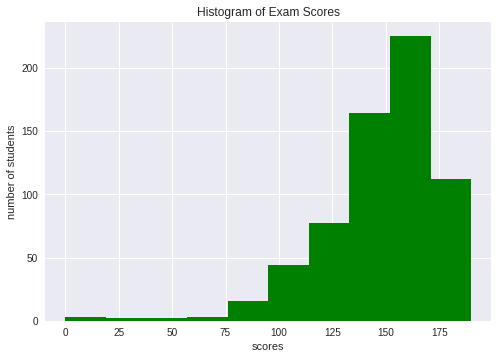

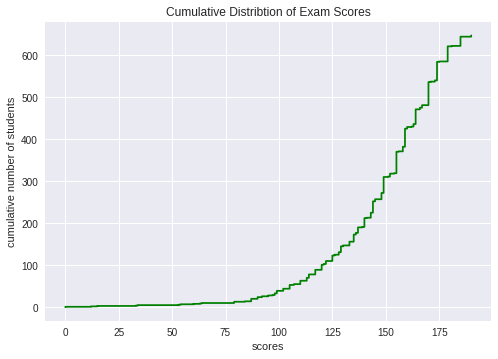

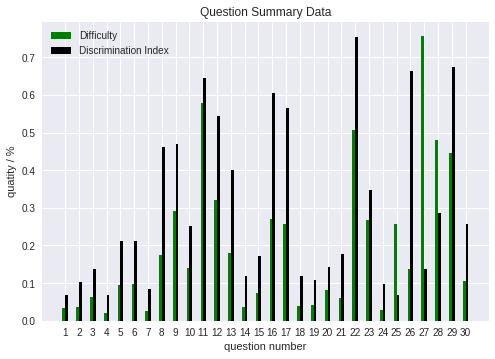

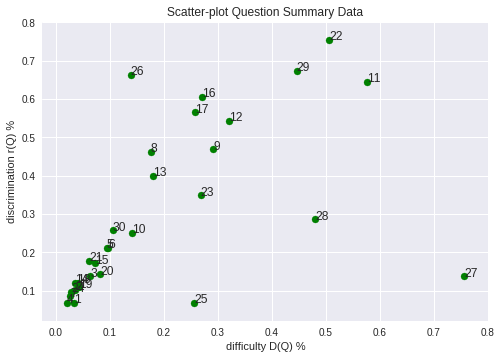

In [18]:
import string as str
#DATA CLEANING
#Creates a new list called student_score that will hold the cleaned data
#In the data cleaning process, if the instructor/TA did the test, his/her doesn't get stored in student_score
#also the % is removed, and any student who didn't appear for the test, isn't used in the evaluation
# the data might contain - ∅ - as void components which are replaced with a 0 in the dataset

student_score=[]
for row in csv_f:
    
    if row[1] == '' or row[0] in instructor_list:
        continue
        
    else:
        p = []
        for i in range (0,no_of_Q+1): 
            row[i+1] = float(row [i+1].replace("%","").replace("- ∅ -","0").replace("Overall grade",'0').replace('2.6 (/2)','0')) 
            p.append(row[i+1])
        
    student_score.append(p)
f.close()
 
    
#TOTAL CALCULATION
total = []
for row in student_score[1:]:
    row[-1]= int((row[-1]*max_points)/100)
    total.append(row[-1])


#CALCULATION BASIC INFORMATION OF THE EXAM
no_of_students = 0
no_of_min_score = 0
no_of_max_score = 0
for s in total:
    no_of_students+=1
    if s == 0:
        no_of_min_score +=1
    if s == max_points:
        no_of_max_score +=1
        
#PRINTING BASIC INFORMATION OF THE EXAM
print ("Students who appeared on the exam: ",no_of_students)
print ("Students who secured min score   : ",no_of_min_score)
print ("Students who secured max score   : ",no_of_max_score)
print ("Median score                     : ", statistics.median(total))
print ("Mean score                       : ", round(statistics.mean(total),2))
print ("Standard Deviation               : ", round(statistics.stdev(total),2))

#PRINTING HISTOGRAM 
plt.hist(total, facecolor = 'green')
plt.title('Histogram of Exam Scores')
plt.xlabel('scores')
plt.ylabel('number of students')
plt.show() 

#PRINTING CUMULATIVE FREQUENCY OF SCORES
sorted_data = np.sort(total)
plt.step(sorted_data,np.arange(sorted_data.size), color = 'g')
plt.title('Cumulative Distribtion of Exam Scores')
plt.xlabel('scores')
plt.ylabel('cumulative number of students')
plt.show()
    
#DIFFICULTY CALCULATION
#The difficulty calculation is only for Multiple-Choice Question and doesn't apply to Coding questions

difficulty = []
for i in range (MCQ_Q_start-1,MCQ_Q_end):
    k = 0
    for m in student_score[1:]:
        if m[i]==0.0:
            k += 1
    k = k/no_of_students
    difficulty.append(k)

#DISCRIMATION CALCULATION
#The discrimination calculation is only for Multiple-Choice Question and doesn't apply to Coding questions

student_score.sort(key=lambda x:x[-1])
#upper bound of bottom 27%
bottom_27_percent = math.ceil((no_of_students*27)/100)
#lower bound of top 27%
top_27_percent = math.ceil((no_of_students*73)/100)
#n value = 54% of total
n_value = math.ceil((no_of_students*54)/100)
di = []

for j in range (MCQ_Q_start-1,MCQ_Q_end):
    right = 0
    for i in range (0, bottom_27_percent+1):
        if student_score[i][j]==100.0:
            right+=1
    right1 = 0
    for i in range (top_27_percent,no_of_students+1):
        if student_score[i][j]==100.0:
            right1+=1
    discri = 2*(right1-right)/n_value
    di.append(discri)


N = MCQ_Q_end-MCQ_Q_start + 1
mcq_question_list = []
for i in range(MCQ_Q_start,MCQ_Q_end+1):
    mcq_question_list.append(i)


    
# DIFFICULTY AND DISCRIMINATION PLOTS
ind = np.arange(N) 
width = 0.20       
fig, ax = plt.subplots()
rects1 = ax.bar(ind, difficulty, width, color='g')
rects2 = ax.bar(ind + width, di, width, color='k')
ax.set_ylabel('quatity / %')
ax.set_xlabel('question number')
ax.set_title('Question Summary Data')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((mcq_question_list))
ax.legend((rects1[0], rects2[0]), ('Difficulty', 'Discrimination Index'))

#SCATTERPLOTS
fig, ax = plt.subplots()
ax.scatter(difficulty, di, color = 'g')
plt.title('Scatter-plot Question Summary Data')
plt.xlabel('difficulty D(Q) %')
plt.ylabel('discrimination r(Q) %')
for i, txt in enumerate(mcq_question_list):
    ax.annotate(txt, (difficulty[i],di[i]))
plt.show()
    


